# Проектная работа по банкам
Нам предоставлен датасет, который содержит данные о клиентах банка «Метанпром». Нам предстоит провести исследовательский анализ данных для определения портрета пользователя, склонного уходить. Для этого мы проведем предобработку данных, построим необходимые гистограммы и проверим гипотезу о равенстве доходов изучаемых групп. На основе предоставленных данных попробуем обучить две модели предсказания оттока и проанализируем их.

### Данное исследование разделим на несколько частей
#### Часть 1. Импортируем библиотеки и загружаем данные :
* <a href="#1.1">[1. Импортируем библиотеки и загружаем данные.]</a>

#### Часть 2. Предобработка данных:
* <a href="#2.1">[1. Предобработка данных.]</a>
  
#### Часть 3. Исследовательский анализ данных :
* <a href="#3.1">[1. Гистограммы распределения изучаемых величин.]</a>
* <a href="#3.2">[2. Средние значения изучаемых величин.]</a>
* <a href="#3.3">[3. Pairplot]</a>
* <a href="#3.4">[4. Матрица корреляции.]</a>
* <a href="#3.5">[5. Проверка гипотезы.]</a>
* <a href="#3.6">[6. Вывод.]</a>

  
#### Часть 4. Построим модель предсказания оттока клиентов
* <a href="#4">[1. Построим модель предсказания оттока клиентов.]</a>

  
#### Часть 5. Вывод проекта:
* <a href="#5">[1. Вывод проекта.]</a>

### Ссылка на презентацию: https://yadi.sk/i/8PdNDEXK1mqvRw

## Импортируем библиотеки и загружаем данные 
<a name='1.1'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score
from warnings import filterwarnings
from sklearn.preprocessing import StandardScaler
from scipy import stats as st
filterwarnings("ignore")

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

In [2]:
bank_data=pd.read_csv('bank_dataset.csv')
bank_data.head(10)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Нам предстоит уменьшить регистр у названий слобцов, заполнить пропущенные данные в balance и сделать userid строковым типом данных

### Коментарий наставника

<font color = blue>Верно
</font>

## Предобработка данных
<a name='2.1'></a>

In [4]:
bank_data.userid=bank_data.userid.astype('str')

Проверка на дупликаты

In [5]:
bank_data.duplicated().sum()

0

Приведем название столбцов к нижнему регистру.

In [6]:
bank_data.columns=bank_data.columns.str.lower()
print('Количество пропущенных значений до заполнения:',bank_data['balance'].isna().sum())

Количество пропущенных значений до заполнения: 3617


Отсутствуют 3600 значений баланса из-за сбоя на строне хранилища. Произведем заполнение пропусков медианами. Для этого выделим медианный баланс пользователя по городу, полу и возрасту. Заполнение таким способом не ударит сильно по распределению баланса и средних.

In [7]:
medians=(bank_data.groupby(['city','gender','age'],as_index=False).agg({'balance':'median'})).rename(columns={'balance':'median_balance'})
bank_data=bank_data.merge(medians, on=['city','gender','age'])
bank_data.loc[bank_data['balance'].isna(), 'balance']=bank_data.loc[bank_data['balance'].isna(), 'median_balance']
bank_data=bank_data.drop('median_balance', axis=1)

In [8]:
print('Количество пропущенных значений после заполнения:',bank_data['balance'].isna().sum())

Количество пропущенных значений после заполнения: 28


Только для 28 пользователей не нашлось значений, просто уберем их.

In [9]:
bank_data=bank_data.dropna()

Мы подготовили наши данные для дальнейшего исследовательского анализа

## Исследовательский анализ данных 
<a name='3.1'></a>

### Гистограммы распределения изучаемых величин

Построим гистограммы распределения каждой величины в разбивке по churn

In [10]:
sns.set_theme(style="darkgrid")
sns.set_palette(['cornflowerblue','green'])

In [11]:
def function_hist(data,column):
    'Функция строит гистограмму распределения колонки column из датафрейма data'
    sns.displot(data,x=column,hue='churn')
    plt.title('Распределение '+name, fontsize=13)
    plt.xlabel(name)
    plt.ylabel('Распределение')
    plt.show()

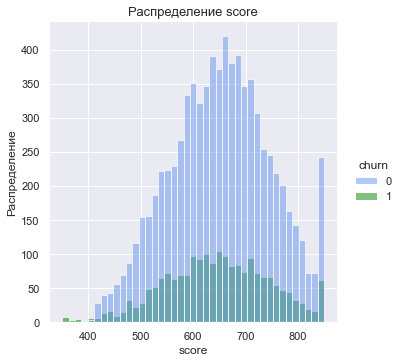

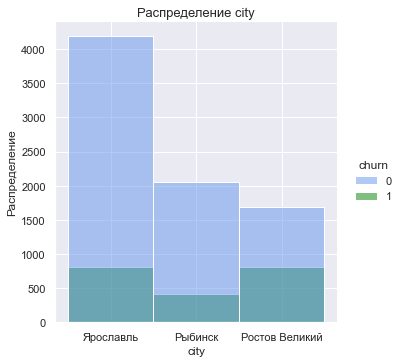

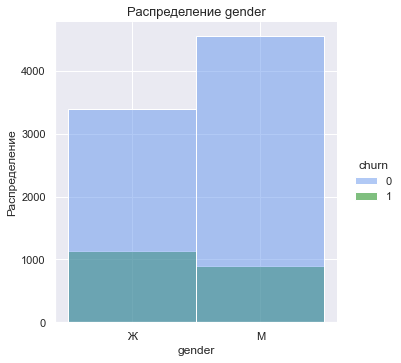

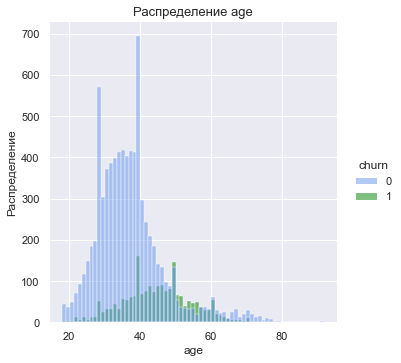

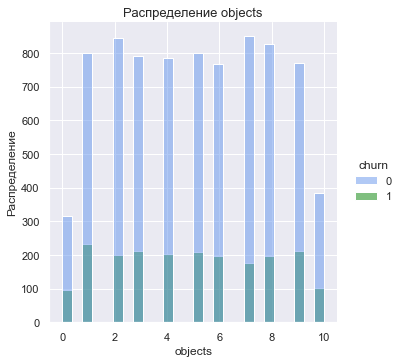

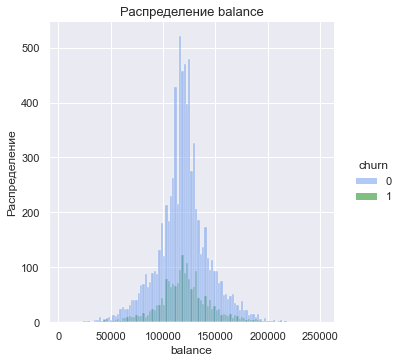

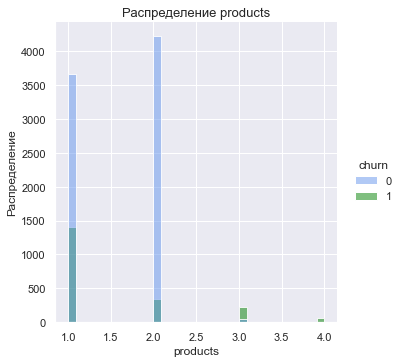

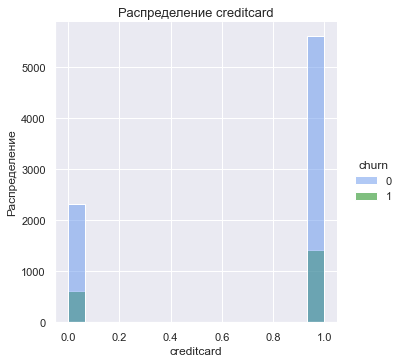

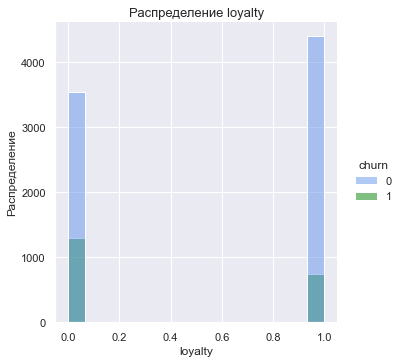

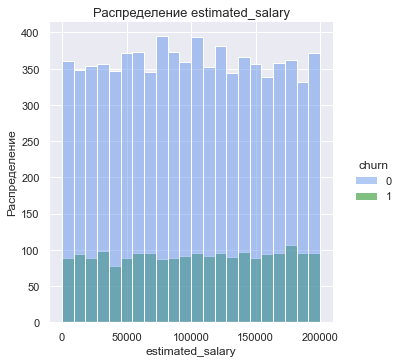

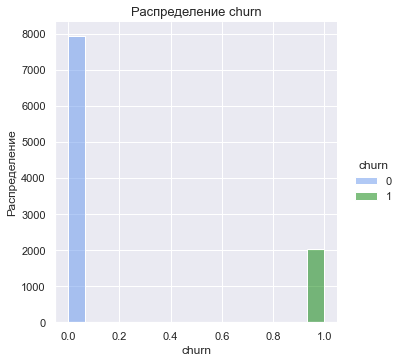

In [12]:
for name in bank_data.columns[1::]:
    function_hist(bank_data,name)

По построенным гистограммам можно сделать промежуточный вывод:
- Почти все пользователи с количеством продуктов 3 и 4 ушли. Пользователи с количеством продуктов 2 уходят реже всего
- estimated_salary рассчитывается на основе данных со стороны (пенсионный фонд, налоговые выкладки), поэтому есть пользователи с зарплатами меньше минимальной. Из гистограммы мы можем сделать вывод, что для каждого churn estimated_salary распределена примерно одинаково, следовательно, обработка таких аномалий просто сдвинет среднее относительно старого положения, но не относительно друг друга.
- balance и score распределен примерно одинаково
- пользователи с 0 loyalty уходят чаще
- в среднем уходят пользователи старше
- женщины уходят заметно чаще мужчин
- в Ростове Великом ушла половина пользователей, возможно, появились какие-то проблемы в качестве предоставляемых услуг 

### Средние значения изучаемых величин
<a name='3.2'></a>

In [13]:
bank_data.describe()

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000
mean,650.462896,38.829322,5.013438,119792.839466,1.529683,0.705275,0.514340,100107.398451,0.204172
std,96.614884,10.322604,2.891828,24934.547569,0.581896,0.455942,0.499819,57499.517203,0.403115
min,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,107719.165000,1.000000,0.000000,0.000000,51014.837500,0.000000
50%,652.000000,37.000000,5.000000,119656.450000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,717.000000,44.000000,7.250000,131394.560000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Посмотрим на количество выбросов в каждом столбце

In [14]:
def function(data,column):
    'Функция рассчета количества выбросов'
    q1=np.percentile(data[column], 25)
    q3=np.percentile(data[column], 75)
    diff=q3-q1
    min_out=q1-diff*1.5
    max_out=q3+diff*1.5

    print('Количество выбросов:',data[np.logical_or(data[column]<min_out,data[column]>max_out)][column].count(),
         '\nЗначения churn выбросов '+str(column)+':',data[np.logical_or(data[column]<min_out,data[column]>max_out)]['churn'].unique())

In [15]:
for name in bank_data.describe().columns:
    print(name)
    function(bank_data,name)

score
Количество выбросов: 16 
Значения churn выбросов score: [1]
age
Количество выбросов: 333 
Значения churn выбросов age: [1 0]
objects
Количество выбросов: 0 
Значения churn выбросов objects: []
balance
Количество выбросов: 775 
Значения churn выбросов balance: [0 1]
products
Количество выбросов: 60 
Значения churn выбросов products: [1]
creditcard
Количество выбросов: 0 
Значения churn выбросов creditcard: []
loyalty
Количество выбросов: 0 
Значения churn выбросов loyalty: []
estimated_salary
Количество выбросов: 0 
Значения churn выбросов estimated_salary: []
churn
Количество выбросов: 2036 
Значения churn выбросов churn: [1]


Теперь мы можем сделать несколько выводов по выбросам: 
- Выбросы в age, balance , churn появились только из-за "кучности" данных у их медианы (в churn 1 составляет только 20 процентов)
- В score выбросов всего 16, но все они принадлежат ушедшим пользователям (не подходят по оценке снизу)
- В products 60 выбросов, которые принадлежат 4 покупкам (не проходят по верхней оценке)  

Однако, в предоставленных данных нет серьезных выбросов, которые портят точность анализа. Посмотрим средние значения величин в группировке по churn

In [16]:
data_grouped=bank_data.groupby('churn',as_index=False).mean()
data_grouped

,churn,score,age,objects,balance,products,creditcard,loyalty,estimated_salary
0,0,651.757308,37.290449,5.034022,119649.935032,1.543599,0.706905,0.553679,99746.350218
1,1,645.417485,44.827603,4.933202,120349.857925,1.475442,0.698919,0.361002,101514.706297


Из средних имеют большое различие только возраст и использование за последний месяц услуг. Ушедшие пользователи в среднем старше и реже пользуются услугами

### Pairplot
<a name='3.3'></a>

Построим pairplot по нашим данным

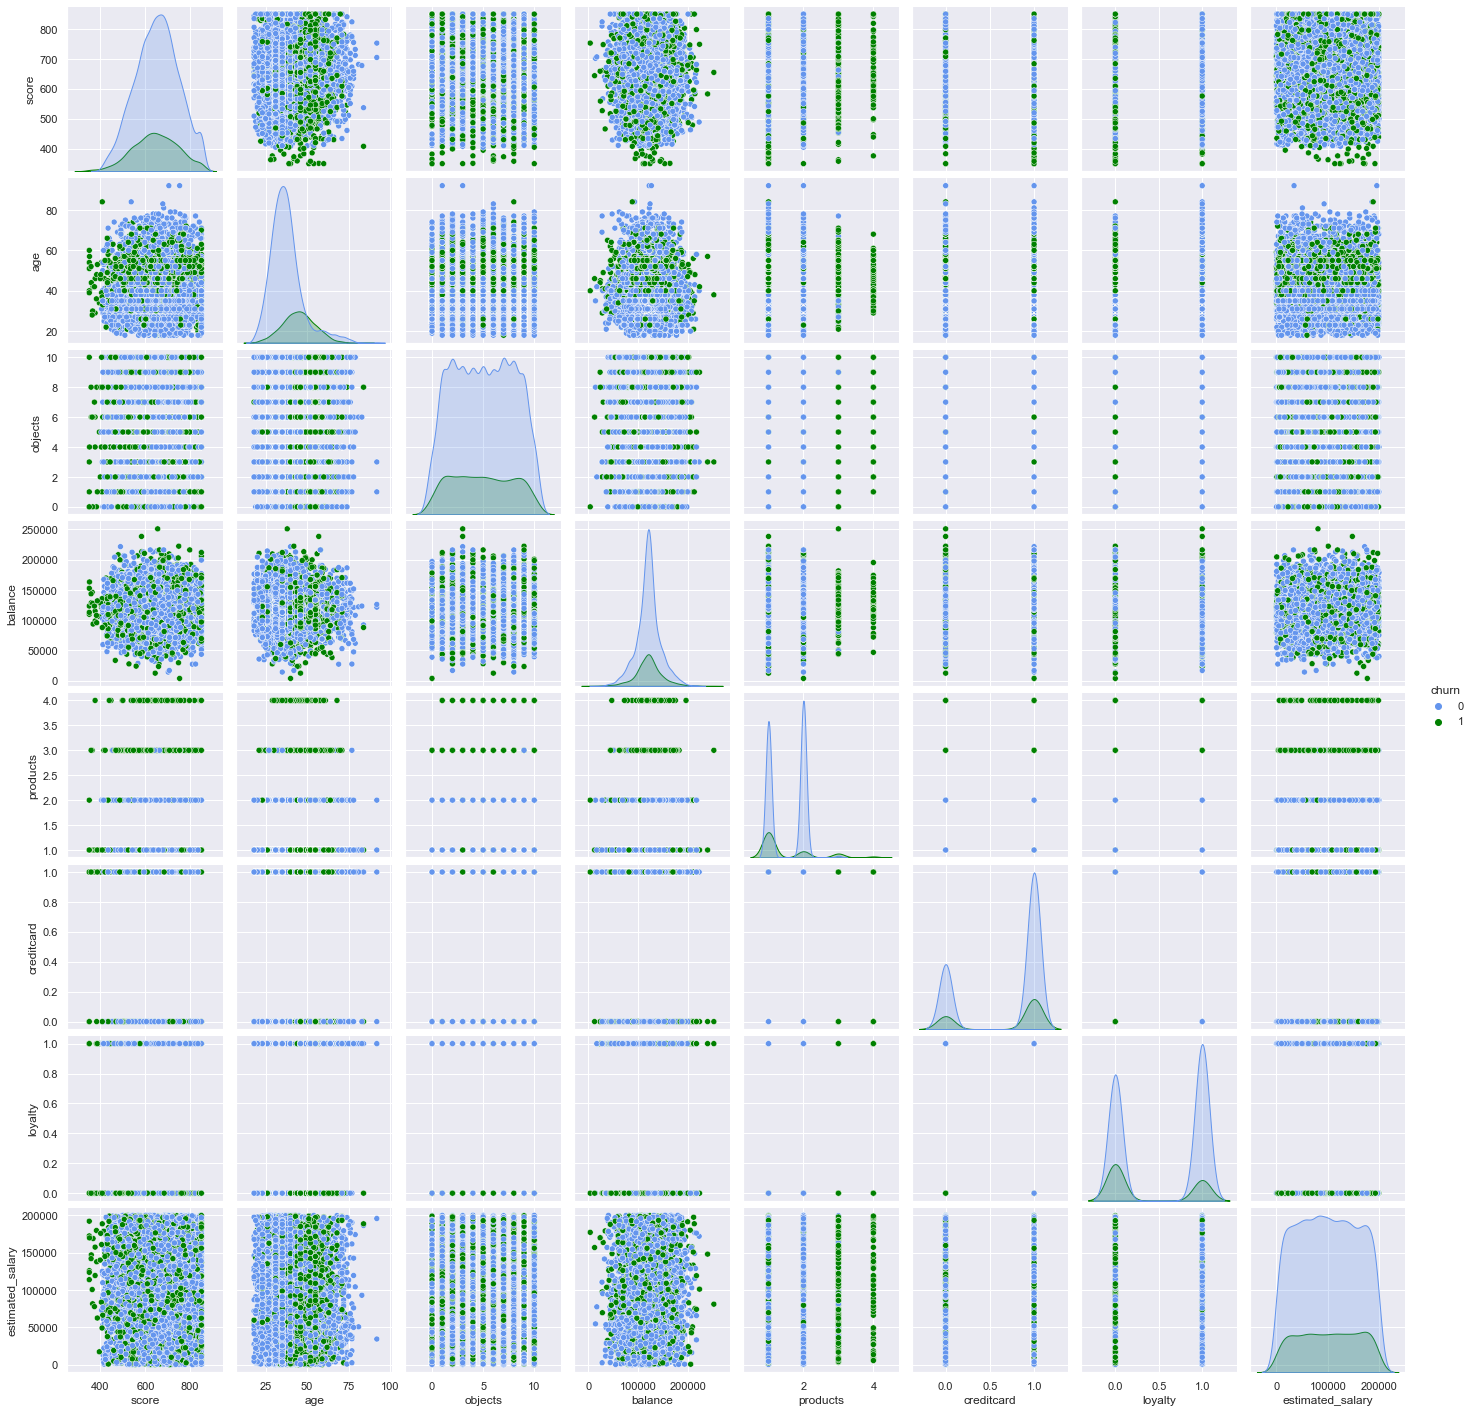

In [17]:
sns.pairplot(bank_data,hue='churn')

Данная таблица графиков лишний раз подтверждает все промежуточные выводы из гистограмм. Построим матрицу корреляций

### Матрица корреляций
<a name='3.4'></a>

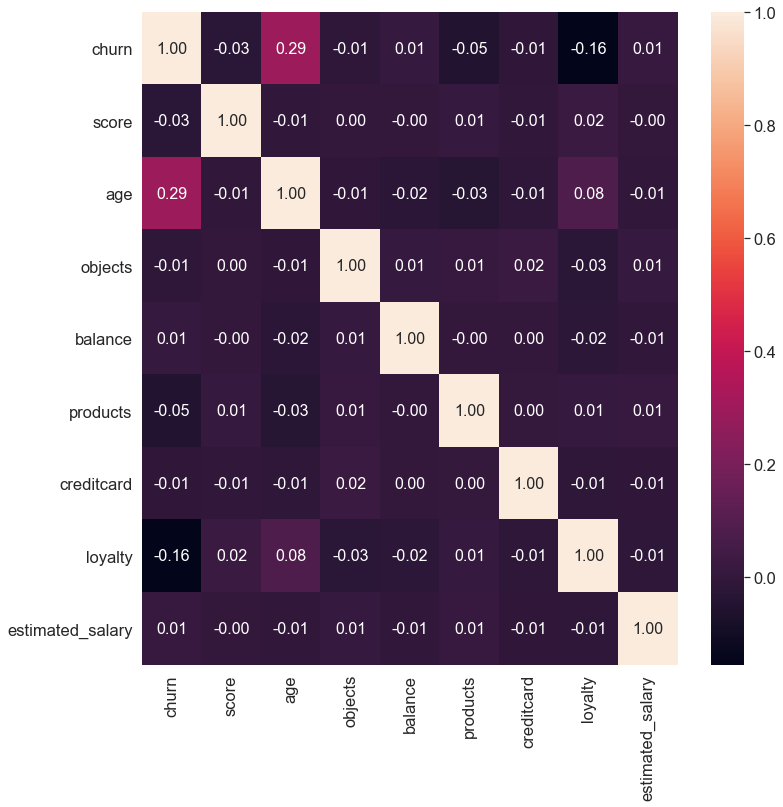

In [18]:
cm=bank_data[data_grouped.columns].corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,fmt='.2f',annot_kws={"size": 16});

В предоставленных данных никаких заметных корреляций не наблюдается

### Проверка гипотезы
<a name='3.5'></a>

Критерий t Стьюдента направлен на оценку различий величин средних $\overline
Х $ и $\overline У $ двух выборок X и Y, которые распределены по нормальному закону.   

Для применения t-критерия Стьюдента необходимо, чтобы исходные данные имели нормальное распределение. Также имеет значение равенство дисперсий (распределения) сравниваемых групп. При неравных дисперсиях применяется t-критерий в модификации Уэлча.

Проверим данные на нормальность

In [19]:
data_churn_0=bank_data.query("churn==0")
data_churn_1=bank_data.query("churn==1")

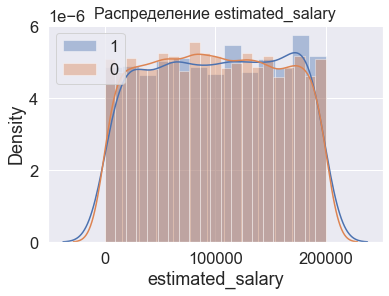

In [20]:
sns.distplot(data_churn_1['estimated_salary'],label='1')
sns.distplot(data_churn_0['estimated_salary'],label='0')
plt.title('Распределение estimated_salary',fontsize=16)
plt.legend()
plt.show()

В грубом приближении мы можем считать, что данные распределены нормально, поэтому проведем t-test.

Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.  
`Нулевая гипотеза`- средняя выручка между оставшимися и ушедними пользователями равна  
`Альтернативная гипотеза` - средняя выручка между оставшимися и ушедними пользователями отличается

In [21]:
alpha=0.05

print('Дисперсия ушедних:',data_churn_1['estimated_salary'].var())
print('Дисперсия оставшихся:',data_churn_0['estimated_salary'].var())

Дисперсия ушедних: 3350597262.1392455
Дисперсия оставшихся: 3294585114.58926


Дисперсии равны

In [22]:
results = st.ttest_ind(
    data_churn_0['estimated_salary'], 
    data_churn_1['estimated_salary'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.21575043652290132
Не получилось отвергнуть нулевую гипотезу


Мы выяснили, что дисперсии ушедших и оставшихся равны и средняя выручка между оставшимися и ушедними пользователями равна.

Проведем аналогичный анализ для score. Сначала проведем проверку на нормальность

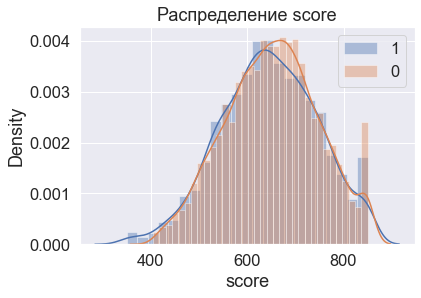

In [23]:
sns.distplot(data_churn_1['score'],label='1')
sns.distplot(data_churn_0['score'],label='0')
plt.title('Распределение score')
plt.legend()
plt.show()

Данные можно считать распределенными нормально.  


In [24]:
alpha=0.05

print('Дисперсия ушедних:',data_churn_1['score'].var())
print('Дисперсия оставшихся:',data_churn_0['score'].var())

Дисперсия ушедних: 10060.475251854823
Дисперсия оставшихся: 9141.20561765711


Дисперсия отличается, так что `equal_var=False`

Проверим гипотезу различия score между теми клиентами, которые ушли и теми, которые остались.  
`Нулевая гипотеза`- средний счет между оставшимися и ушедними пользователями равен.
`Альтернативная гипотеза` - средний счет между оставшимися и ушедними пользователями отличается.

In [25]:
results = st.ttest_ind(
    data_churn_0['score'], 
    data_churn_1['score'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.010265266552568045
Отвергаем нулевую гипотезу


Мы отвергли гипотезу о равестве средних score ушедших и оставшихся. Получается, уходящие пользователи становятся менее заинтересованными и их активнсть немного падает. 

### Вывод
<a name='3.6'></a>

В данном блоке мы выяснили, что больше всего склонны уходить пользователи с 0 лояльностью, женского пола, из Ростова Великого, старшего возраста. Также мы заметили, что почти все пользователи с количеством покупок 3 и 4 ушли. Проверили нулевую гипотезу- средняя выручка между оставшимися и ушедними пользователями равна и не смогли ее отвергнуть

## Построим модель предсказания оттока клиентов
<a name='4'></a>

Проведем кодирование данных для обучения логистической регрессии и случайного леса

In [26]:
data_for_ml=bank_data[bank_data.columns[1::]]
data_for_ml=pd.get_dummies(data_for_ml[bank_data.columns[1::]]) 

In [27]:
data_for_ml

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,619,42,2,121453.63,1,1,1,101348.88,1,0,0,1,1,0
1,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
2,597,42,4,64740.12,1,1,1,106841.12,0,0,0,1,1,0
3,640,42,5,176099.13,1,1,1,8404.73,0,0,0,1,1,0
4,787,42,10,145988.65,2,1,1,79510.37,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,605,75,2,61319.63,1,0,1,186655.11,0,1,0,0,0,1
9994,678,83,6,123356.63,1,0,1,92934.41,0,1,0,0,0,1
9996,719,76,10,95052.29,1,1,0,176244.87,0,1,0,0,1,0
9997,649,78,4,68345.86,2,1,1,142566.75,0,1,0,0,0,1


In [28]:
X=data_for_ml[data_for_ml.columns[1::]].drop(columns='churn')
y=data_for_ml['churn']

Разделим выборки на тренировочную и валидационную

In [29]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_sc=scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

In [30]:
def train_model(m):
    'Функция тренирует модель m на тестовых данных и рассчитывает все необходимые метрики'
    print(m)
    model=m
    model.fit(X_train_sc,y_train)
    y_pred=model.predict(X_test_sc)
    print('Accuracy',accuracy_score(y_test,y_pred), 
         '\nRecall',recall_score(y_test,y_pred),
         '\nPrecision',precision_score(y_test,y_pred),'\n')

In [31]:
for mod in [LogisticRegression(), RandomForestClassifier()]:
    train_model(mod)

LogisticRegression()
Accuracy 0.8135338345864662 
Recall 0.2131979695431472 
Precision 0.5753424657534246 

RandomForestClassifier()
Accuracy 0.8546365914786967 
Recall 0.43908629441624364 
Precision 0.7148760330578512 



### Вывод
Accuracy высокая у обоих моделей, но это обусловлено тем, что данные распределены неравномерно(ушедших всего 20%). В данном проекте наиболее важной метрикой является recall (мы предсказали, что пользователь не уйдет, а он ушел). Эта метрика хоть и больше у случайного леса в два раза, однако недостаточно велика. Из этого можно сделать вывод, что на этих данных мы можем обучить только слаботочные модели, для повышения точности нужно больше данных

## Вывод проекта
<a name='5'></a>

- 1. Произведено заполнение пропущенных данных balance по принадлежности пользователя к городу, полу и возрасту. Уменьшен регистр у названий слобцов.
- 2. Построенны гистограммы распределения величин в разбивке по churn и получены следующие результаты:
    - Почти все пользователи с количеством продуктов 3 и 4 ушли. Пользователи с количеством продуктов 2 уходят реже всего
    - estimated_salary рассчитывается на основе данных со стороны (пенсионный фонд, налоговые выкладки), поэтому есть пользователи с зарплатами меньше минимальной. Из гистограммы мы можем сделать вывод, что для каждого churn estimated_salary распределена примерно одинаково, следовательно, обработка таких аномалий просто сдвинет среднее относительно старого положения, но не относительно друг друга.
    - balance и score распределен примерно одинаково
    - пользователи с 0 loyalty уходят чаще
    - в среднем уходят пользователи старше
    - женщины уходят заметно чаще мужчин
    - в Ростове Великом ушла половина пользователей, возможно, появились какие-то проблемы в качестве предоставляемых услуг 
    - выявлен портрет пользователя, который уйдет с очень большой вероятностью: `пользователи с 0 лояльностью, женского пола, из Ростова Великого, старшего возраста. Также мы заметили, что почти все пользователи с количеством покупок 3 и 4 ушли.`
- 3. Мы проверили проверку гипотез:   
`Нулевая гипотеза`- средняя выручка между оставшимися и ушедними пользователями равна    
`Альтернативная гипотеза` - средняя выручка между оставшимися и ушедними пользователями отличается.  
__Мы не смогли отвергнуть нулевую гипотезу__
- 4. __Мы отвергли гипотезу о равестве средних score ушедших и оставшихся.__ Получается, уходящие пользователи становятся менее заинтересованными и их активнсть немного падает 
- 5. Мы попытались обучить модель предсказания оттока, однако мы выяснили,что на этих данных мы можем обучить только слаботочные модели, для повышения точности нужно больше данных.

### Рекомендации
Следует провести анализ качества предоставляемых услуг в городе Ростов Великий, предоставить дополнительные услуги/льготы для пользователей с 3 и более продуктами. Провести акции по удержанию пользователей старших лет и женщин, постараться увеличить используемость продукции в месяц